# 피트니스 자세 데이터 전처리

## keypoint 데이터 로드

In [115]:
import os
import pandas as pd
import numpy as np

In [118]:
test_single = np.load("561-1-3-27-Z115_C-0000004.jpg.npy")
test_single

array([[ 0.37174696,  0.64402461,  0.03077054,  0.99990571,  0.9999963 ],
       [ 0.36243665,  0.63687539,  0.00545352,  0.999892  ,  0.99999559],
       [ 0.3623119 ,  0.6341992 ,  0.00528762,  0.99989021,  0.99999619],
       [ 0.36219603,  0.63171291,  0.00540519,  0.99993193,  0.99999547],
       [ 0.36226666,  0.63705397,  0.03701873,  0.99990427,  0.99999285],
       [ 0.36200452,  0.63435543,  0.03680024,  0.99989128,  0.99999309],
       [ 0.36179465,  0.63159305,  0.03679571,  0.99992359,  0.99999189],
       [ 0.36320299,  0.61176616, -0.07606772,  0.99990392,  0.99999666],
       [ 0.36330682,  0.61200875,  0.06834321,  0.99980944,  0.99999249],
       [ 0.37864989,  0.6339556 ,  0.00682187,  0.99983406,  0.99999702],
       [ 0.37864763,  0.63437128,  0.04700251,  0.99971777,  0.99998939],
       [ 0.39690661,  0.5799762 , -0.16208142,  0.9999795 ,  0.99999559],
       [ 0.40382999,  0.5576551 ,  0.16110995,  0.99981397,  0.99997163],
       [ 0.42765403,  0.63408291, -0.2

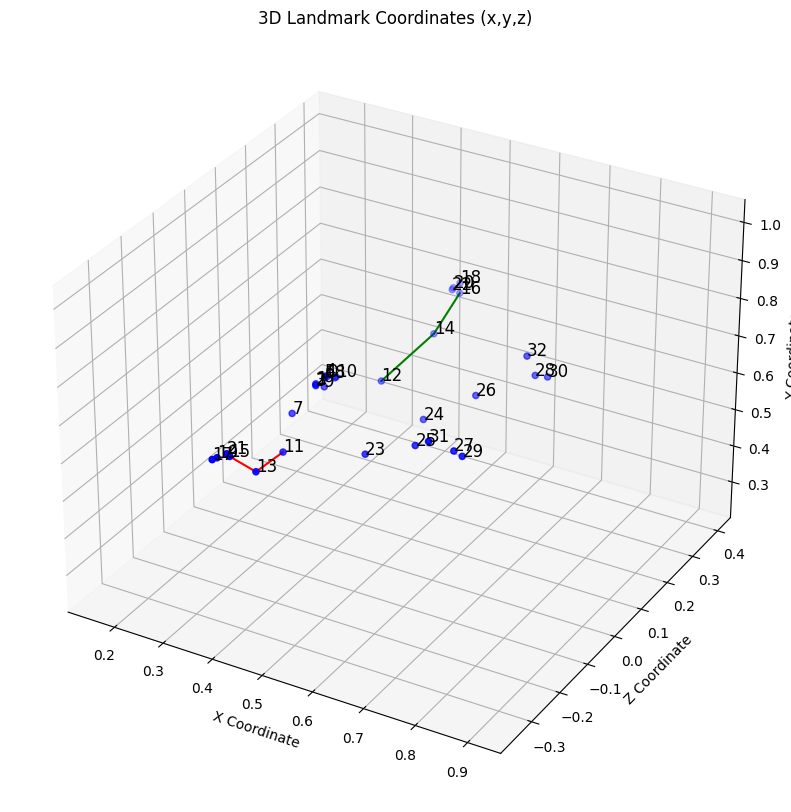

In [119]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 파싱
x_coords = [landmark[0] for landmark in test_single]
z_coords = [landmark[1] for landmark in test_single]  # Swap y and z
y_coords = [landmark[2] for landmark in test_single]

# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords,y_coords,z_coords,c='b',marker='o')
ax.set_title('3D Landmark Coordinates (x,y,z)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Z Coordinate')  # Swap labels as well
ax.set_zlabel('Y Coordinate')

max_range=np.array([max(x_coords)-min(x_coords), max(y_coords)-min(y_coords), max(z_coords)-min(z_coords)]).max() / 2.0

mid_x=(max(x_coords)+min(x_coords)) * 0.5
mid_y=(max(y_coords)+min(y_coords)) * 0.5
mid_z=(max(z_coords)+min(z_coords)) * 0.5

ax.set_xlim(mid_x - max_range,mid_x + max_range)
ax.set_ylim(mid_y - max_range,mid_y + max_range) # Swap here too 
ax.set_zlim(mid_z - max_range,mid_z + max_range)

for i , landmark in enumerate(test_single):
    ax.text(x_coords[i], y_coords[i], z_coords[i], str(i), fontsize=12)

# Right arm lines (11-13 and 13-15)
x_line_r1=[test_single[i][0] for i in [11,13]]
z_line_r1=[test_single[i][1] for i in [11,13]] # And here ...
y_line_r1=[test_single[i][2] for i in [11,13]]

x_line_r2=[test_single[i][0] for i in [13,15]]
z_line_r2=[test_single[i][1] for i in [13,15]] # And here ...
y_line_r2=[test_single[i][2] for i in [13,15]]

# Left arm lines (12-14 and 14-16)
x_line_l1=[test_single[i][0] for i in [12,14]]
z_line_l1=[test_single[i][1] for i in [12,14]] # And here ...
y_line_l1=[test_single[i][2] for i in [12,14]]

x_line_l2=[test_single[i][0] for i in [14,16]]
z_line_l2=[test_single[i][1] for i in [14,16]] # And here ...
y_line_l2=[test_single[i][2] for i in [14,16]]

ax.plot(x_line_r1,y_line_r1,z_line_r1,c='r')
ax.plot(x_line_r2,y_line_r2,z_line_r2,c='r')
ax.plot(x_line_l1,y_line_l1,z_line_l1,c='g')
ax.plot(x_line_l2,y_line_l2,z_line_l2,c='g')

plt.grid(True)
plt.show()


Right arm:  [ 0.39690661  0.5799762  -0.16208142  0.9999795   0.99999559] [ 0.42765403  0.63408291 -0.298677    0.96195662  0.9998821 ] [ 0.41226372  0.70699018 -0.3555184   0.95219654  0.99999237]
Left arm:  [0.40382999 0.5576551  0.16110995 0.99981397 0.99997163] [0.42603487 0.59821671 0.31065267 0.00484799 0.9999578 ] [0.42216736 0.64407235 0.41214263 0.04539112 0.99999571]


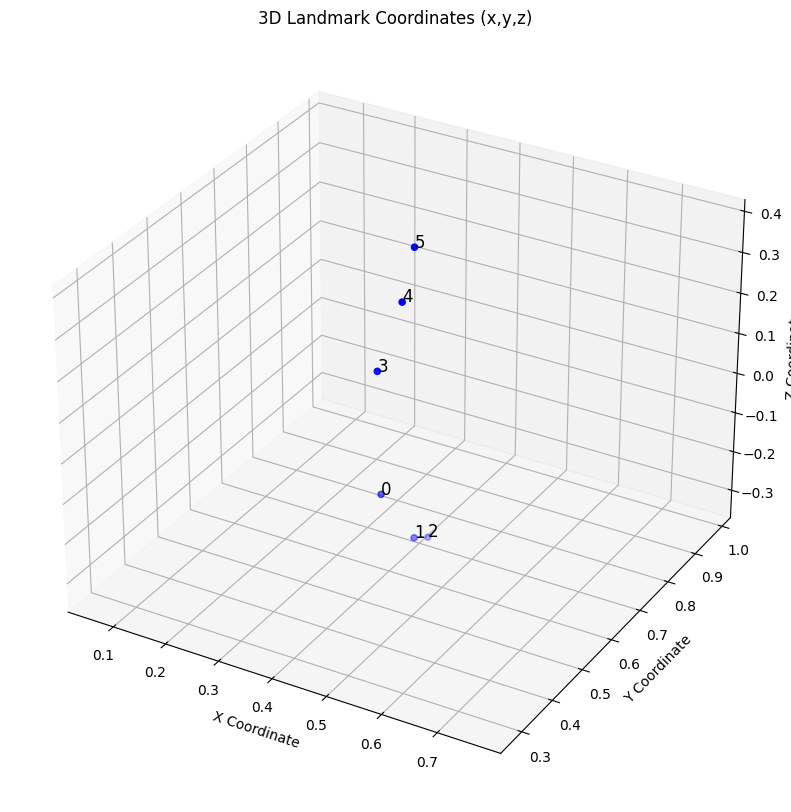

In [120]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shoulder_right = test_single[11]
elbow_right = test_single[13]
wrist_right = test_single[15]

# Left arm
shoulder_left = test_single[12]
elbow_left = test_single[14]
wrist_left= test_single[16]

print("Right arm: ", shoulder_right, elbow_right, wrist_right)
print("Left arm: ", shoulder_left, elbow_left, wrist_left)

# 데이터 파싱
x_coords = [landmark[0] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]
y_coords = [landmark[1] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]
z_coords = [landmark[2] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]
visibility = [landmark[3] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]
presence = [landmark[4] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]

# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords,y_coords,z_coords,c='b',marker='o')
ax.set_title('3D Landmark Coordinates (x,y,z)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

max_range=np.array([max(x_coords)-min(x_coords), max(y_coords)-min(y_coords), max(z_coords)-min(z_coords)]).max() / 2.0

mid_x=(max(x_coords)+min(x_coords)) * 0.5
mid_y=(max(y_coords)+min(y_coords)) * 0.5
mid_z=(max(z_coords)+min(z_coords)) * 0.5

ax.set_xlim(mid_x - max_range,mid_x + max_range)
ax.set_ylim(mid_y - max_range,mid_y + max_range)
ax.set_zlim(mid_z - max_range,mid_z + max_range)

for i , landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    ax.text(x_coords[i], y_coords[i], z_coords[i], str(i), fontsize=12)

plt.grid(True)
plt.show()

## X, Y 평면

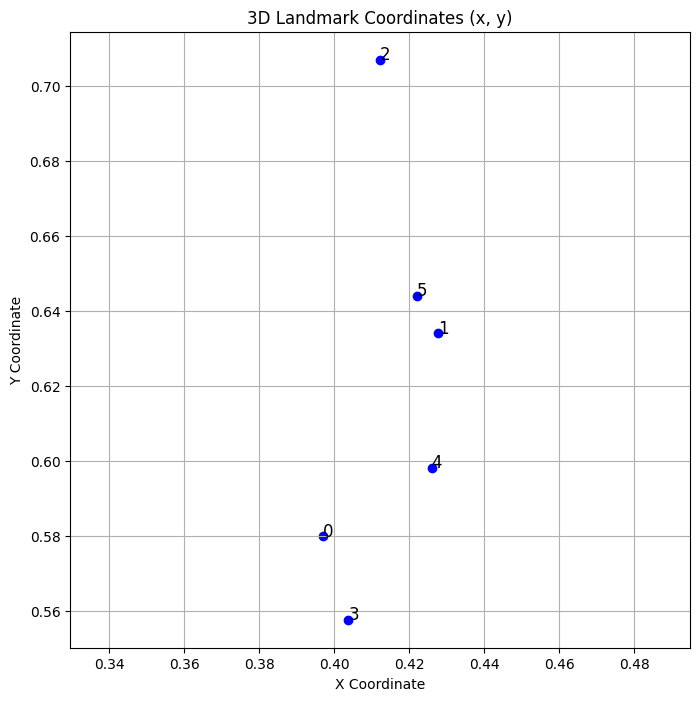

In [121]:
import matplotlib.pyplot as plt

# # 데이터 파싱
# x_coords = [landmark["x"] for landmark in test_single]
# y_coords = [landmark["y"] for landmark in test_single]

# 산점도 (scatter plot) 그리기
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, c='b', marker='o')
plt.title('3D Landmark Coordinates (x, y)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# 각 점에 랜드마크 이름 추가
for i, landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    plt.annotate(i, (x_coords[i], y_coords[i]), fontsize=12)

# 그래프 표시
plt.grid(True)
plt.axis('equal') 
plt.show()


In [113]:
import math

def calculate_xy_angle(a, b, c):
    # 벡터 생성
    ba = [a[0]-b[0], a[1]-b[1]] # 벡터 BA
    bc = [c[0]-b[0], c[1]-b[1]] # 벡터 BC

    # 내적 계산
    dot_product = ba[0]*bc[0] + ba[1]*bc[1]

    # 두 벡터의 크기 계산
    magnitude_ba = math.sqrt(ba[0]**2 + ba[1]**2)
    magnitude_bc = math.sqrt(bc[0]**2 + bc[1]**2)

    # cos(theta) 계산
    cos_theta = dot_product / (magnitude_ba * magnitude_bc)

    # acos(cos_theta)를 사용하여 theta(라디안 단위) 찾기, 그리고 degree로 변환 
    angle_in_degree = math.acos(cos_theta) * (180 / math.pi)

    return angle_in_degree

In [114]:
angle_right_arm= calculate_xy_angle(shoulder_right[:-1], elbow_right[:-1], wrist_right[:-1])
angle_left_arm= calculate_xy_angle(shoulder_left[:-1], elbow_left[:-1], wrist_left[:-1])

print("Right arm angle: ", angle_right_arm)
print("Left arm angle: ", angle_left_arm)

Right arm angle:  138.47176135179745
Left arm angle:  146.48116138782007


## Y, Z 평면

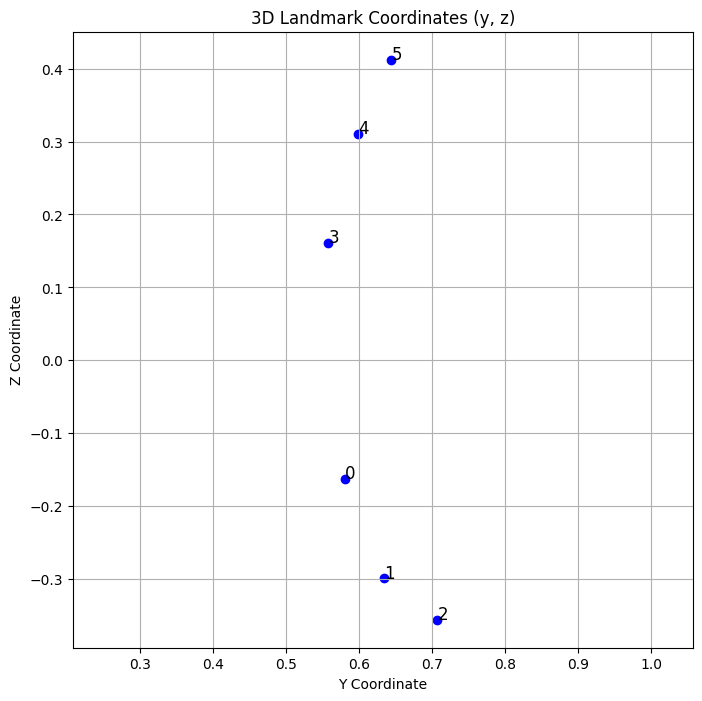

In [87]:
import matplotlib.pyplot as plt

# # 데이터 파싱
# x_coords = [landmark["x"] for landmark in test_single]
# y_coords = [landmark["y"] for landmark in test_single]

# 산점도 (scatter plot) 그리기
plt.figure(figsize=(8, 8))
plt.scatter(y_coords, z_coords, c='b', marker='o')
plt.title('3D Landmark Coordinates (y, z)')
plt.xlabel('Y Coordinate')
plt.ylabel('Z Coordinate')

# 각 점에 랜드마크 이름 추가
for i, landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    plt.annotate(i, (y_coords[i], z_coords[i]), fontsize=12)

# 그래프 표시
plt.grid(True)
plt.axis('equal') 
plt.show()


## X, Z 평면

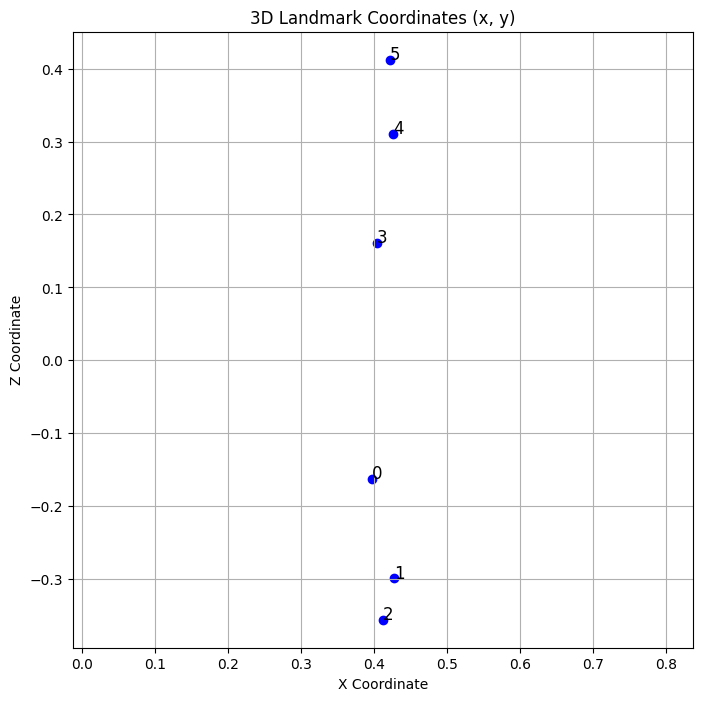

In [88]:
import matplotlib.pyplot as plt

# 산점도 (scatter plot) 그리기
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, z_coords, c='b', marker='o')
plt.title('3D Landmark Coordinates (x, y)')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

# 각 점에 랜드마크 이름 추가
for i, landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    plt.annotate(i, (x_coords[i], z_coords[i]), fontsize=12)

# 그래프 표시
plt.grid(True)
plt.axis('equal') 
plt.show()


## 각도 계산

In [89]:
import numpy as np

def calculate_angle(a, b, c):
    ba = a - b # vector from point b to a
    bc = c - b # vector from point b to c

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

In [90]:
angle_right_arm= calculate_angle(shoulder_right, elbow_right, wrist_right)
angle_left_arm= calculate_angle(shoulder_left, elbow_left, wrist_left)

print("Right arm angle: ", angle_right_arm)
print("Left arm angle: ", angle_left_arm)

Right arm angle:  143.00626729589732
Left arm angle:  166.3630849050036


## 사진 2

In [122]:
test_single = np.load("561-1-3-27-Z115_C-0000001.jpg.npy")
test_single

array([[ 3.75849158e-01,  5.31037688e-01, -2.27283295e-02,
         9.99969482e-01,  9.99994278e-01],
       [ 3.67909074e-01,  5.21651566e-01, -4.37265299e-02,
         9.99954462e-01,  9.99992967e-01],
       [ 3.67931843e-01,  5.19217968e-01, -4.38894518e-02,
         9.99956131e-01,  9.99994040e-01],
       [ 3.67948532e-01,  5.17026603e-01, -4.38376889e-02,
         9.99969363e-01,  9.99992609e-01],
       [ 3.67576808e-01,  5.22094369e-01, -1.35040898e-02,
         9.99967456e-01,  9.99989867e-01],
       [ 3.67403835e-01,  5.19885361e-01, -1.37185482e-02,
         9.99970794e-01,  9.99990582e-01],
       [ 3.67168248e-01,  5.17615438e-01, -1.37591772e-02,
         9.99981046e-01,  9.99988556e-01],
       [ 3.69981170e-01,  4.97633129e-01, -1.02338307e-01,
         9.99962091e-01,  9.99992013e-01],
       [ 3.69794011e-01,  4.99540240e-01,  3.53462584e-02,
         9.99924660e-01,  9.99984264e-01],
       [ 3.83464038e-01,  5.24274170e-01, -3.85880247e-02,
         9.99886632e-01

Right arm:  [ 0.41391888  0.50330222 -0.1731452   0.99997306  0.99999404] [ 0.4202148   0.60913968 -0.21426846  0.98102242  0.99997807] [ 0.41804126  0.71003652 -0.18986337  0.98128223  0.99998188]
Left arm:  [0.42118084 0.48128551 0.1384699  0.99978524 0.99994707] [0.43036783 0.5706535  0.17476057 0.02360804 0.99994278] [0.42983052 0.65490198 0.08765715 0.14114091 0.99998963]


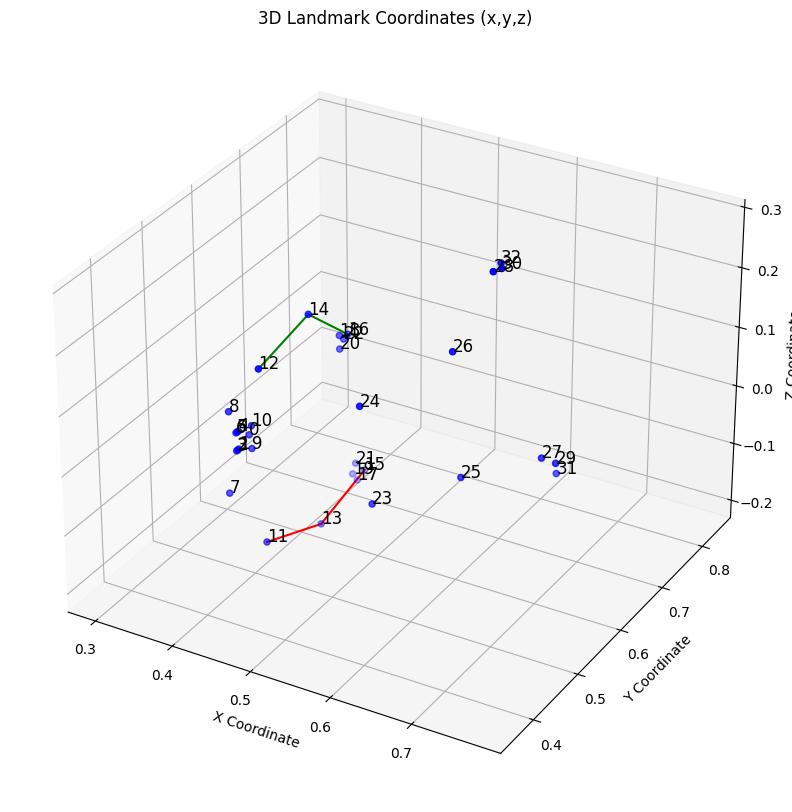

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shoulder_right = test_single[11]
elbow_right = test_single[13]
wrist_right = test_single[15]

# Left arm
shoulder_left = test_single[12]
elbow_left = test_single[14]
wrist_left= test_single[16]

print("Right arm: ", shoulder_right, elbow_right, wrist_right)
print("Left arm: ", shoulder_left, elbow_left, wrist_left)

# 데이터 파싱
x_coords = [landmark[0] for landmark in test_single]
y_coords = [landmark[1] for landmark in test_single]
z_coords = [landmark[2] for landmark in test_single]

# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords,y_coords,z_coords,c='b',marker='o')
ax.set_title('3D Landmark Coordinates (x,y,z)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

max_range=np.array([max(x_coords)-min(x_coords), max(y_coords)-min(y_coords), max(z_coords)-min(z_coords)]).max() / 2.0

mid_x=(max(x_coords)+min(x_coords)) * 0.5
mid_y=(max(y_coords)+min(y_coords)) * 0.5
mid_z=(max(z_coords)+min(z_coords)) * 0.5

ax.set_xlim(mid_x - max_range,mid_x + max_range)
ax.set_ylim(mid_y - max_range,mid_y + max_range)
ax.set_zlim(mid_z - max_range,mid_z + max_range)

for i , landmark in enumerate(test_single):
    ax.text(x_coords[i], y_coords[i], z_coords[i], str(i), fontsize=12)

# Right arm lines (11-13 and 13-15)
x_line_r1=[test_single[i][0] for i in [11,13]]
y_line_r1=[test_single[i][1] for i in [11,13]]
z_line_r1=[test_single[i][2] for i in [11,13]]

x_line_r2=[test_single[i][0] for i in [13,15]]
y_line_r2=[test_single[i][1] for i in [13,15]]
z_line_r2=[test_single[i][2] for i in [13,15]]

# Left arm lines (12-14 and 14-16)
x_line_l1=[test_single[i][0] for i in [12,14]]
y_line_l1=[test_single[i][1] for i in [12,14]]
z_line_l1=[test_single[i][2] for i in [12,14]]

x_line_l2=[test_single[i][0] for i in [14,16]]
y_line_l2=[test_single[i][1] for i in [14,16]]
z_line_l2=[test_single[i][2] for i in [14,16]]

ax.plot(x_line_r1,y_line_r1,z_line_r1,c='r')
ax.plot(x_line_r2,y_line_r2,z_line_r2,c='r')
ax.plot(x_line_l1,y_line_l1,z_line_l1,c='g')
ax.plot(x_line_l2,y_line_l2,z_line_l2,c='g')

plt.grid(True)
plt.show()

In [124]:
[shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]

[array([ 0.41391888,  0.50330222, -0.1731452 ,  0.99997306,  0.99999404]),
 array([ 0.4202148 ,  0.60913968, -0.21426846,  0.98102242,  0.99997807]),
 array([ 0.41804126,  0.71003652, -0.18986337,  0.98128223,  0.99998188]),
 array([0.42118084, 0.48128551, 0.1384699 , 0.99978524, 0.99994707]),
 array([0.43036783, 0.5706535 , 0.17476057, 0.02360804, 0.99994278]),
 array([0.42983052, 0.65490198, 0.08765715, 0.14114091, 0.99998963])]

Right arm:  [ 0.41391888  0.50330222 -0.1731452   0.99997306  0.99999404] [ 0.4202148   0.60913968 -0.21426846  0.98102242  0.99997807] [ 0.41804126  0.71003652 -0.18986337  0.98128223  0.99998188]
Left arm:  [0.42118084 0.48128551 0.1384699  0.99978524 0.99994707] [0.43036783 0.5706535  0.17476057 0.02360804 0.99994278] [0.42983052 0.65490198 0.08765715 0.14114091 0.99998963]


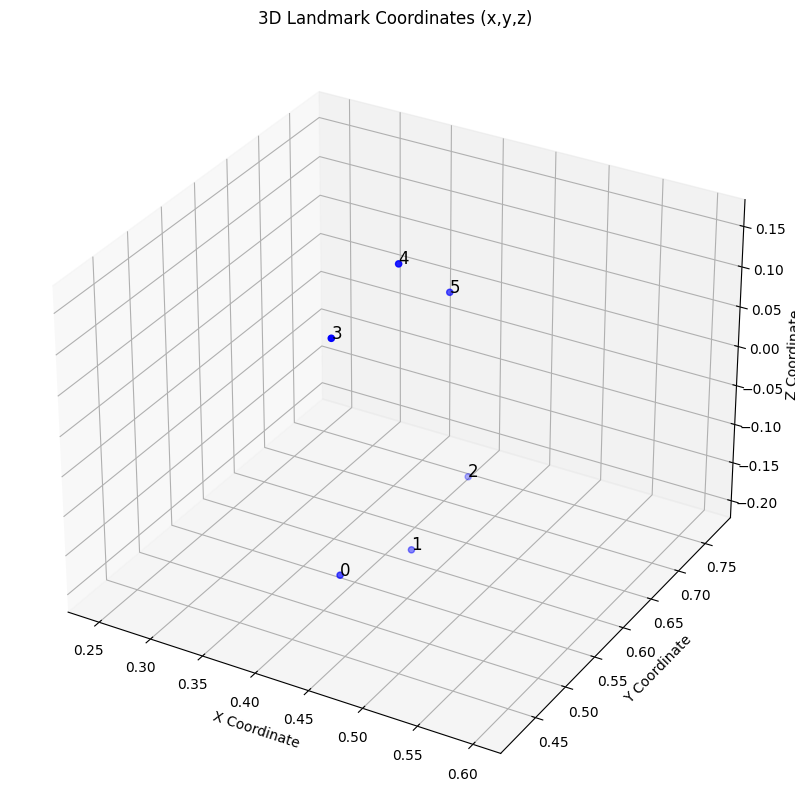

In [125]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shoulder_right = test_single[11]
elbow_right = test_single[13]
wrist_right = test_single[15]

# Left arm
shoulder_left = test_single[12]
elbow_left = test_single[14]
wrist_left= test_single[16]

print("Right arm: ", shoulder_right, elbow_right, wrist_right)
print("Left arm: ", shoulder_left, elbow_left, wrist_left)

# 데이터 파싱
x_coords = [landmark[0] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]
y_coords = [landmark[1] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]
z_coords = [landmark[2] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]

# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords,y_coords,z_coords,c='b',marker='o')
ax.set_title('3D Landmark Coordinates (x,y,z)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

max_range=np.array([max(x_coords)-min(x_coords), max(y_coords)-min(y_coords), max(z_coords)-min(z_coords)]).max() / 2.0

mid_x=(max(x_coords)+min(x_coords)) * 0.5
mid_y=(max(y_coords)+min(y_coords)) * 0.5
mid_z=(max(z_coords)+min(z_coords)) * 0.5

ax.set_xlim(mid_x - max_range,mid_x + max_range)
ax.set_ylim(mid_y - max_range,mid_y + max_range)
ax.set_zlim(mid_z - max_range,mid_z + max_range)

for i , landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    ax.text(x_coords[i], y_coords[i], z_coords[i], str(i), fontsize=12)

plt.grid(True)
plt.show()

## X, Y 평면

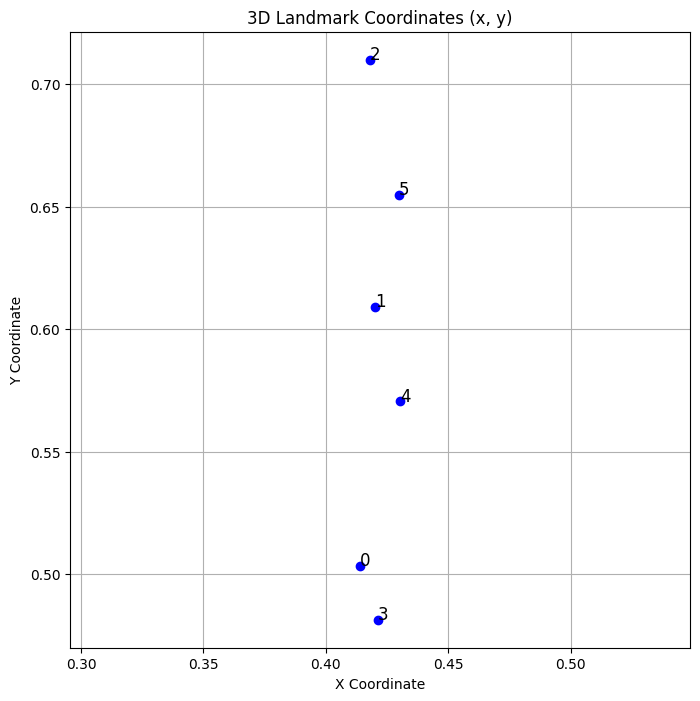

In [126]:
import matplotlib.pyplot as plt

# 산점도 (scatter plot) 그리기
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, c='b', marker='o')
plt.title('3D Landmark Coordinates (x, y)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# 각 점에 랜드마크 이름 추가
for i, landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    plt.annotate(i, (x_coords[i], y_coords[i]), fontsize=12)

# 그래프 표시
plt.grid(True)
plt.axis('equal') 
plt.show()


In [105]:
import math

def calculate_xy_angle(a, b, c):
    # 벡터 생성
    ba = [a[0]-b[0], a[1]-b[1]] # 벡터 BA
    bc = [c[0]-b[0], c[1]-b[1]] # 벡터 BC

    # 내적 계산
    dot_product = ba[0]*bc[0] + ba[1]*bc[1]

    # 두 벡터의 크기 계산
    magnitude_ba = math.sqrt(ba[0]**2 + ba[1]**2)
    magnitude_bc = math.sqrt(bc[0]**2 + bc[1]**2)

    # cos(theta) 계산
    cos_theta = dot_product / (magnitude_ba * magnitude_bc)

    # acos(cos_theta)를 사용하여 theta(라디안 단위) 찾기, 그리고 degree로 변환 
    angle_in_degree = math.acos(cos_theta) * (180 / math.pi)

    return angle_in_degree

In [107]:
angle_right_arm= calculate_xy_angle(shoulder_right[:-1], elbow_right[:-1], wrist_right[:-1])
angle_left_arm= calculate_xy_angle(shoulder_left[:-1], elbow_left[:-1], wrist_left[:-1])

print("Right arm angle: ", angle_right_arm)
print("Left arm angle: ", angle_left_arm)

Right arm angle:  175.36158801402746
Left arm angle:  173.7652339670461


## Y, Z 평면

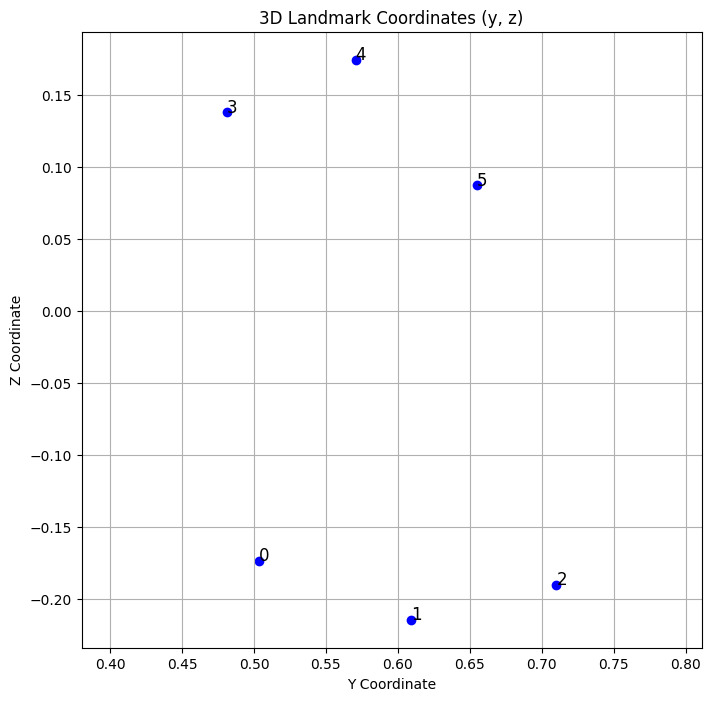

In [101]:
import matplotlib.pyplot as plt

# # 데이터 파싱
# x_coords = [landmark["x"] for landmark in test_single]
# y_coords = [landmark["y"] for landmark in test_single]

# 산점도 (scatter plot) 그리기
plt.figure(figsize=(8, 8))
plt.scatter(y_coords, z_coords, c='b', marker='o')
plt.title('3D Landmark Coordinates (y, z)')
plt.xlabel('Y Coordinate')
plt.ylabel('Z Coordinate')

# 각 점에 랜드마크 이름 추가
for i, landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    plt.annotate(i, (y_coords[i], z_coords[i]), fontsize=12)

# 그래프 표시
plt.grid(True)
plt.axis('equal') 
plt.show()


## X, Z 평면

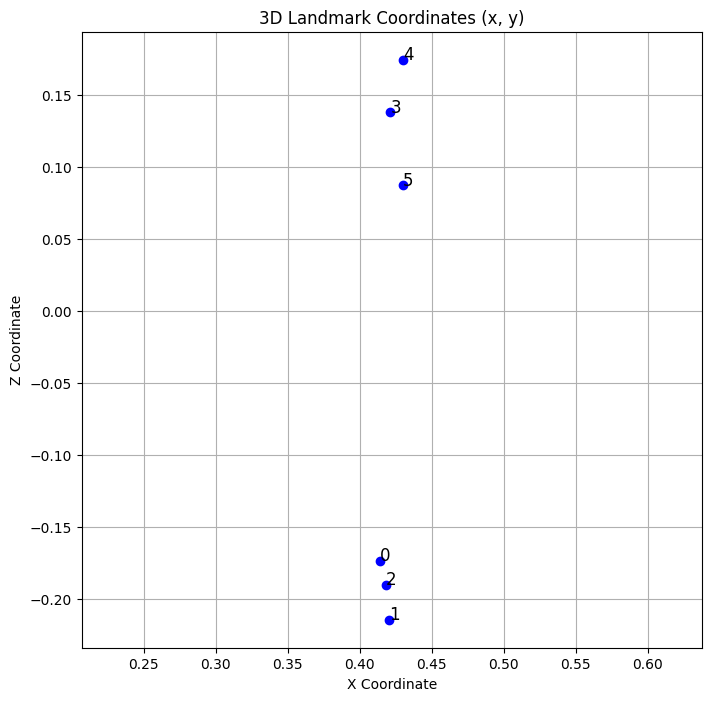

In [102]:
import matplotlib.pyplot as plt

# 산점도 (scatter plot) 그리기
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, z_coords, c='b', marker='o')
plt.title('3D Landmark Coordinates (x, y)')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

# 각 점에 랜드마크 이름 추가
for i, landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    plt.annotate(i, (x_coords[i], z_coords[i]), fontsize=12)

# 그래프 표시
plt.grid(True)
plt.axis('equal') 
plt.show()


In [106]:
angle_right_arm= calculate_angle(shoulder_right, elbow_right, wrist_right)
angle_left_arm= calculate_angle(shoulder_left, elbow_left, wrist_left)

print("Right arm angle: ", angle_right_arm)
print("Left arm angle: ", angle_left_arm)

Right arm angle:  175.36158801402746
Left arm angle:  173.7652339670461
